#**1. Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 676 entries, 0 to 675

Data columns (total 30 columns):

 #   Column                      Non-Null Count  Dtype  

---  ------                      --------------  -----  

 0   product_id                  676 non-null    object 

 1   product_category_name       676 non-null    object 

 2   month_year                  676 non-null    object 

 3   qty                         676 non-null    int64  

 4   total_price                 676 non-null    float64

 5   freight_price               676 non-null    float64

 6   unit_price                  676 non-null    float64

 7   product_name_lenght         676 non-null    int64  

 8   product_description_lenght  676 non-null    int64  

 9   product_photos_qty          676 non-null    int64  

 10  product_weight_g            676 non-null    int64  

 11  product_score               676 non-null    float64

 12  customers                   676 non-null    int64  

 13  weekday          

In [5]:
df.drop(['s'], axis=1)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [6]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


Dates in the data frames are inconsistent(dd-mm-yyyy) format so we make it as (yyyy-mm-dd)


In [7]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['year'] = df['month_year'].dt.year
df['month'] = df['month_year'].dt.month
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [8]:
df['product_category_name'].value_counts()

,count
product_category_name,
garden_tools,160
health_beauty,130
watches_gifts,103
computers_accessories,69
bed_bath_table,61
cool_stuff,57
furniture_decor,48
perfumery,26
consoles_games,22


In [9]:
df.nunique()

,0
product_id,52
product_category_name,9
month_year,20
qty,66
total_price,573
freight_price,653
unit_price,280
product_name_lenght,24
product_description_lenght,46
product_photos_qty,7


#**2. Exploratory Data Analysis**

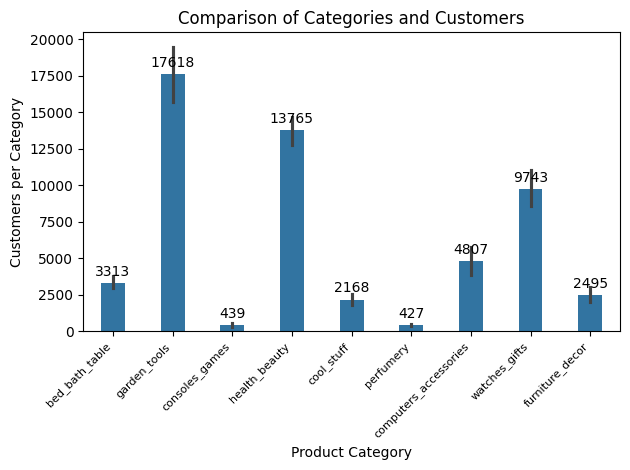

In [10]:
# Create the bar plot
ax = sns.barplot(x='product_category_name', y='customers', data=df, estimator=sum, width=0.4)

# Add total counts at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Comparison of Categories and Customers')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('Customers per Category')

# Show plot
plt.tight_layout()
plt.show()

In [11]:
list(df.columns)

['product_id',
 'product_category_name',
 'month_year',
 'qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price']

# **Feature Engineering**

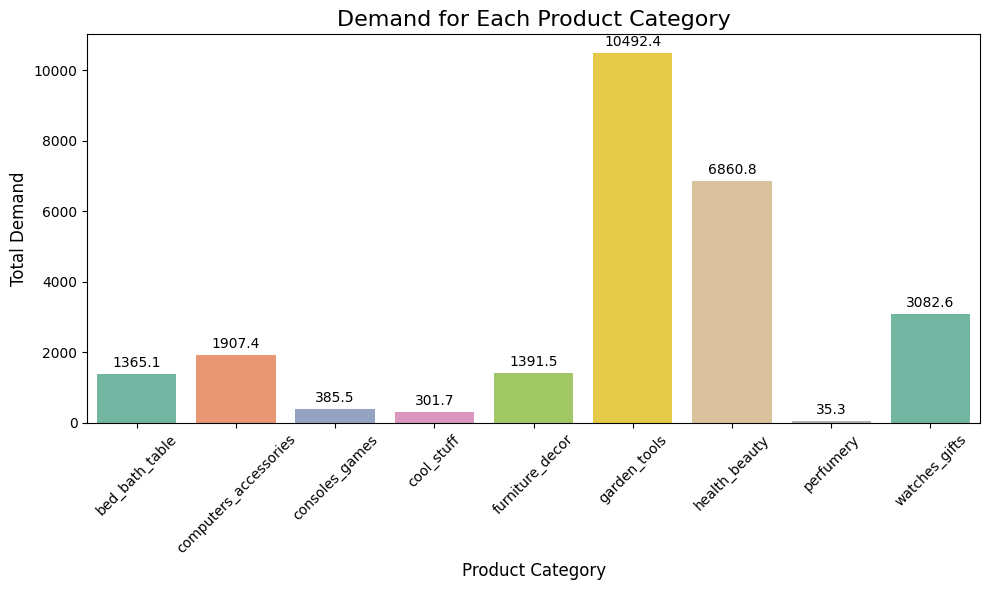

In [12]:
# Define the linear demand function to work on a row of a DataFrame
def linear_demand_function(row, alpha=10, beta1=-0.5, beta2=0.8, beta3=1.2):
    """
    A linear demand function that calculates demand based on unit price, number of customers, and product score.
    """
    unit_price = row['unit_price']
    customers = row['customers']
    product_score = row['product_score']

    # Calculate demand
    demand = alpha + beta1 * unit_price + beta2 * customers + beta3 * product_score
    return max(demand, 0)

# Apply the linear_demand_function to each row in the DataFrame
df['demand'] = df.apply(linear_demand_function, axis=1)

# Group demand by 'product_category_name' to visualize it
demand_by_category = df.groupby('product_category_name')['demand'].sum().reset_index()

# Plot the demand for each product category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='product_category_name', y='demand', data=demand_by_category, palette='Set2')

# Add total counts (demand) at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Demand for Each Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()



Profit margin of our product with respect to competitors

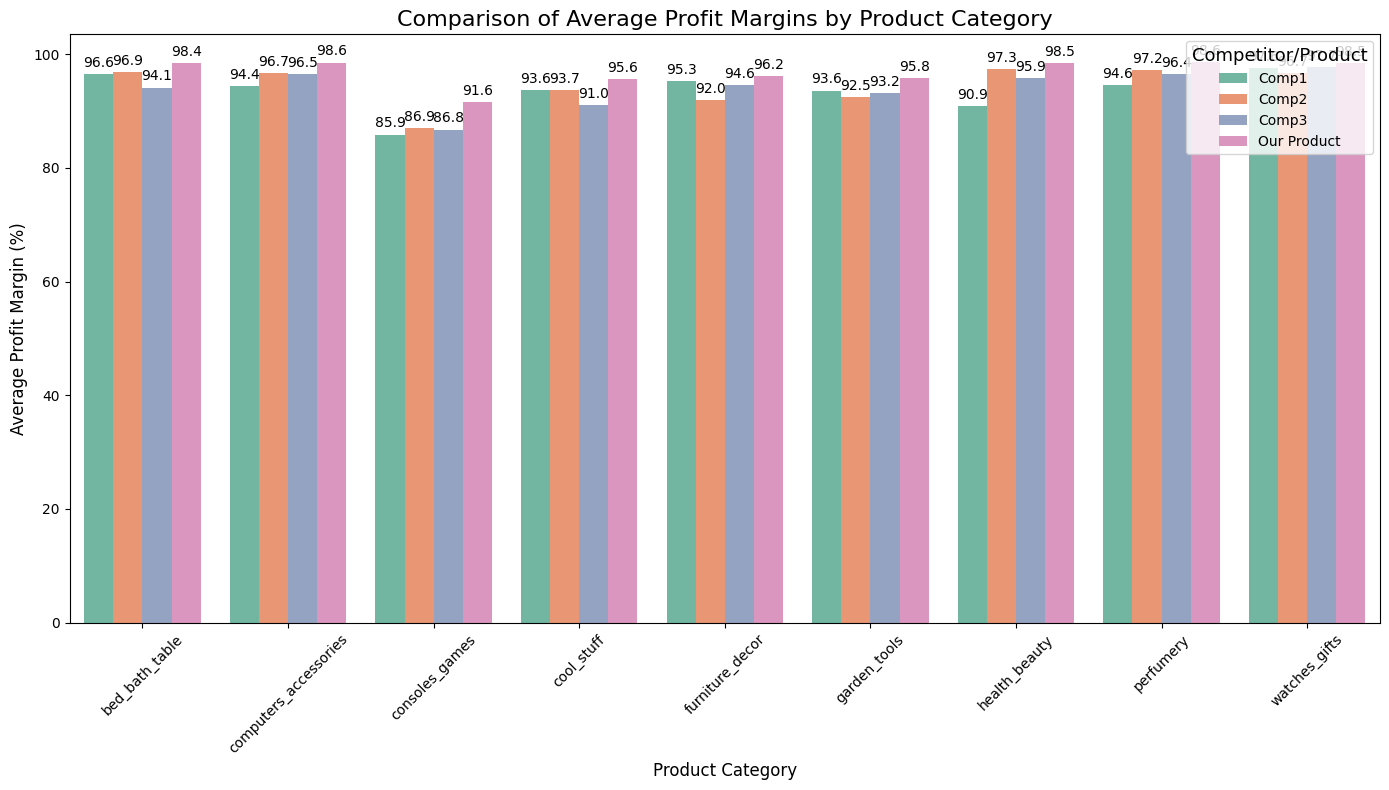

In [13]:
# Calculate revenue, profit, and margin for each competitor and your product
df["revenue_comp1"] = df["qty"] * df["comp_1"]
df["profit_comp1"] = df["revenue_comp1"] - df["fp1"]
df["margin_comp1"] = (df["profit_comp1"] / df["revenue_comp1"]) * 100

df["revenue_comp2"] = df["qty"] * df["comp_2"]
df["profit_comp2"] = df["revenue_comp2"] - df["fp2"]
df["margin_comp2"] = (df["profit_comp2"] / df["revenue_comp2"]) * 100

df["revenue_comp3"] = df["qty"] * df["comp_3"]
df["profit_comp3"] = df["revenue_comp3"] - df["fp3"]
df["margin_comp3"] = (df["profit_comp3"] / df["revenue_comp3"]) * 100

df["revenue_our_product"] = df["qty"] * df["total_price"]
df["profit_our_product"] = df["revenue_our_product"] - df["freight_price"]
df["margin_our_product"] = (df["profit_our_product"] / df["revenue_our_product"]) * 100

# Group by 'product_category_name' to calculate the average margin for each competitor and your product
avg_margin_df = df.groupby('product_category_name').agg({
    'margin_comp1': 'mean',
    'margin_comp2': 'mean',
    'margin_comp3': 'mean',
    'margin_our_product': 'mean'
}).reset_index()

# Melt the data to bring it into long format for easier plotting
avg_margin_melted = pd.melt(avg_margin_df, id_vars='product_category_name',
                            value_vars=['margin_comp1', 'margin_comp2', 'margin_comp3', 'margin_our_product'],
                            var_name='Competitor', value_name='Average Profit Margin')

# Rename for better visualization
avg_margin_melted['Competitor'] = avg_margin_melted['Competitor'].replace({
    'margin_comp1': 'Comp1',
    'margin_comp2': 'Comp2',
    'margin_comp3': 'Comp3',
    'margin_our_product': 'Our Product'
})

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='product_category_name', y='Average Profit Margin', hue='Competitor', data=avg_margin_melted, palette='Set2')

# Add annotations at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3, fontsize=10)

# Add titles and labels
plt.title('Comparison of Average Profit Margins by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Competitor/Product', title_fontsize='13', fontsize='10')
plt.tight_layout()
plt.show()



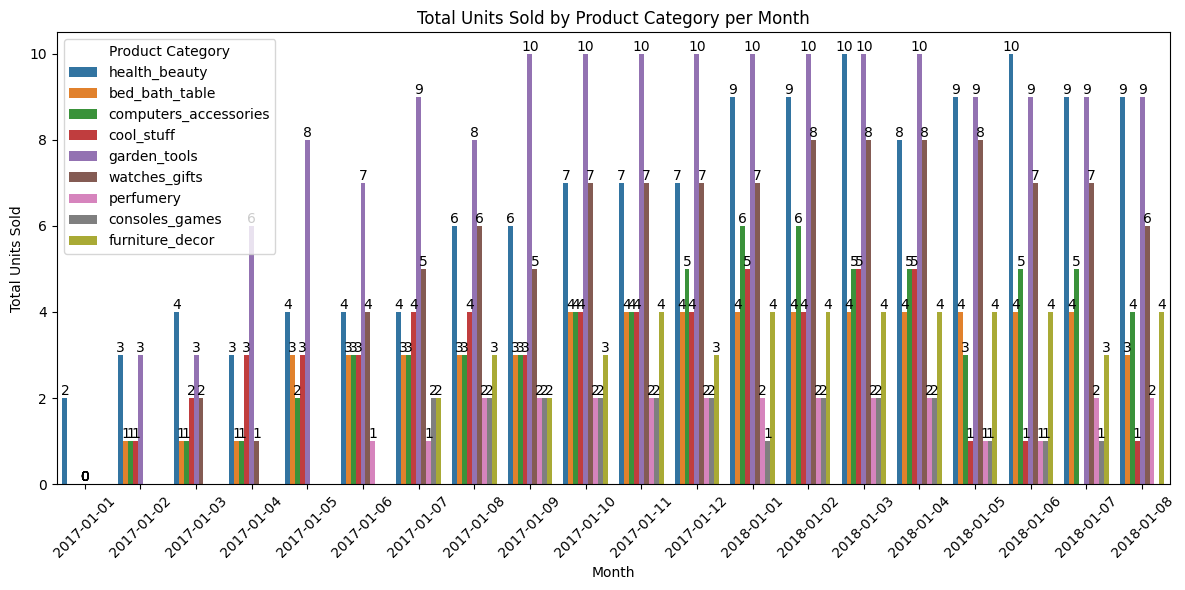

In [14]:
# Count the occurrences of each month and product category
grouped_data = df.groupby(['month_year', 'product_category_name']).size().reset_index(name='units_sold')

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=grouped_data, x='month_year', y='units_sold', hue='product_category_name')

# Annotate the bars with total units sold
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Total Units Sold by Product Category per Month')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.legend(title='Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

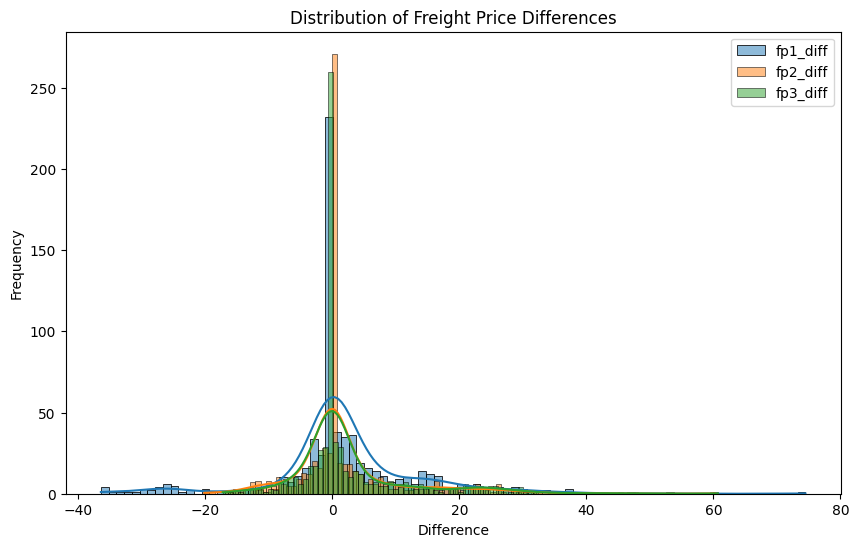

In [15]:
df["fp1_diff"] = df["freight_price"] - df["fp1"]
df["fp2_diff"] = df["freight_price"] - df["fp2"]
df["fp3_diff"] = df["freight_price"] - df["fp3"]
plt.figure(figsize=(10, 6))
sns.histplot(df["fp1_diff"], label="fp1_diff", kde=True)
sns.histplot(df["fp2_diff"], label="fp2_diff", kde=True)
sns.histplot(df["fp3_diff"], label="fp3_diff", kde=True)
plt.title("Distribution of Freight Price Differences")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

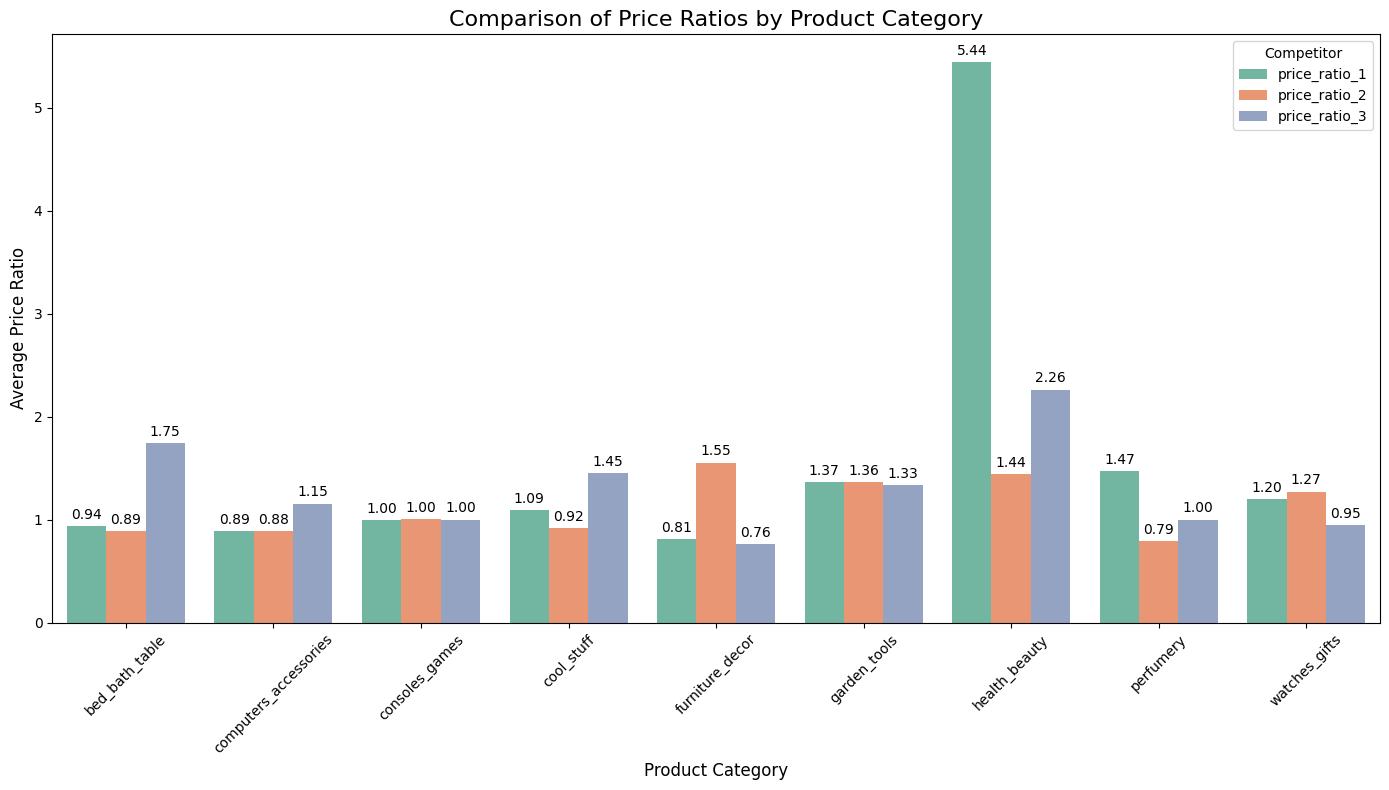

In [16]:
# Calculate price ratios
df["price_ratio_1"] = df["unit_price"] / df["comp_1"]
df["price_ratio_2"] = df["unit_price"] / df["comp_2"]
df["price_ratio_3"] = df["unit_price"] / df["comp_3"]

# Group by 'product_category_name' and 'month_year', then calculate mean price ratios
price_ratios = df.groupby(['product_category_name', 'month_year']).agg({
    'price_ratio_1': 'mean',
    'price_ratio_2': 'mean',
    'price_ratio_3': 'mean'
}).reset_index()

# Reshape data using melt for easy plotting
price_ratios_melted = pd.melt(price_ratios, id_vars=['product_category_name', 'month_year'],
                              var_name='Competitor', value_name='Price Ratio')

# Plot the grouped bar chart comparing price ratios by product category
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='product_category_name', y='Price Ratio', hue='Competitor', data=price_ratios_melted, ci=None, palette='Set2')

# Add total counts (price ratio) at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Comparison of Price Ratios by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Competitor', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


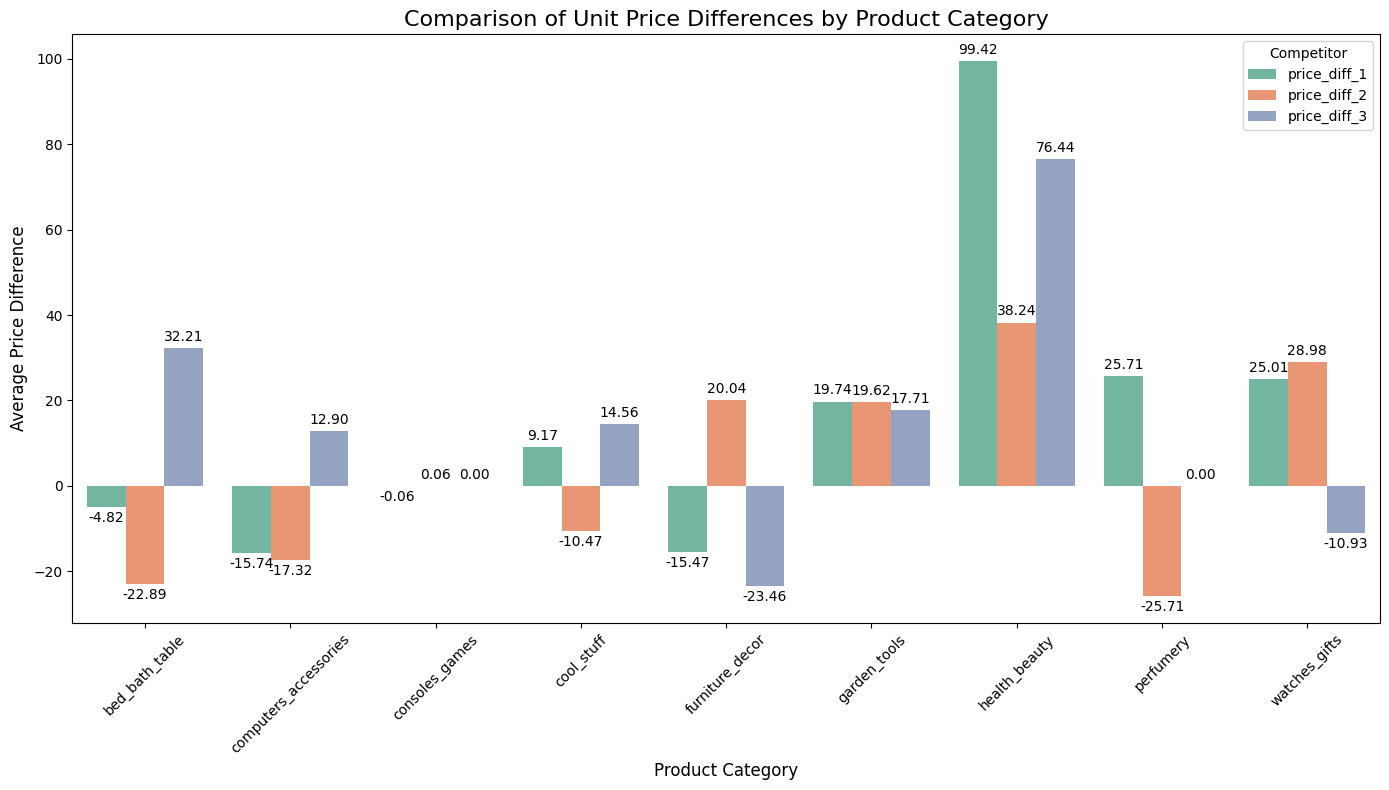

In [17]:
# Calculate price differences
df["price_diff_1"] = df["unit_price"] - df["comp_1"]
df["price_diff_2"] = df["unit_price"] - df["comp_2"]
df["price_diff_3"] = df["unit_price"] - df["comp_3"]

# Group by 'product_category_name' and 'month_year' to calculate the mean price differences
price_diffs = df.groupby(['product_category_name', 'month_year']).agg({
    'price_diff_1': 'mean',
    'price_diff_2': 'mean',
    'price_diff_3': 'mean'
}).reset_index()

# Reshape the data using melt for easy plotting
price_diffs_melted = pd.melt(price_diffs, id_vars=['product_category_name', 'month_year'],
                             var_name='Competitor', value_name='Price Difference')

# Plot the grouped bar chart comparing price differences by product category
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='product_category_name', y='Price Difference', hue='Competitor', data=price_diffs_melted, ci=None, palette='Set2')

# Add total counts (price differences) at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Comparison of Unit Price Differences by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price Difference', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Competitor', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


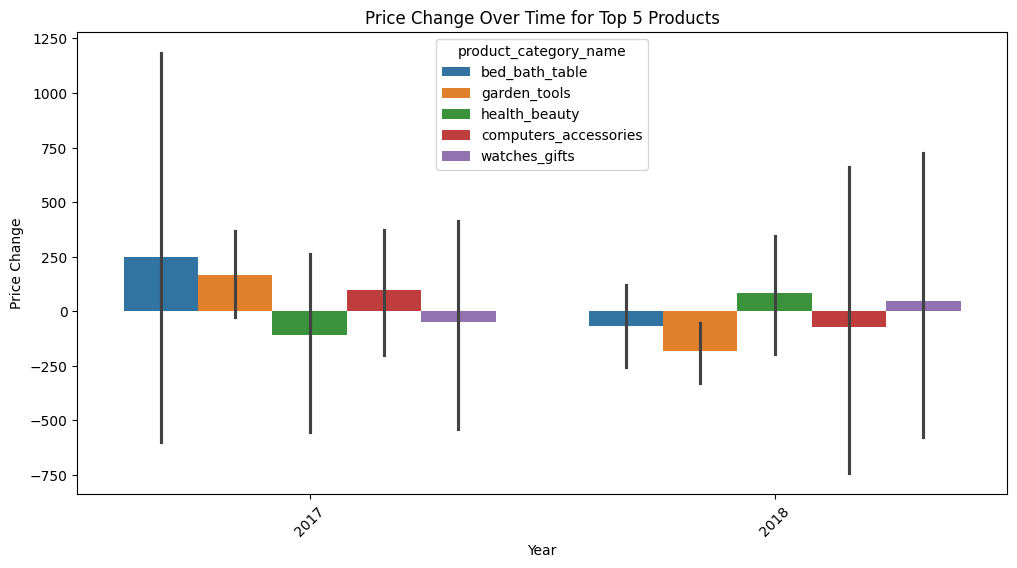

In [18]:
df["lag_price"] = df.groupby("product_category_name")["total_price"].shift(1)
df['price_change'] = df['total_price'] - df['lag_price']
top_products = df['product_category_name'].value_counts().nlargest(5).index
filtered_df = df[df['product_category_name'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price_change', hue='product_category_name', data=filtered_df)
plt.title('Price Change Over Time for Top 5 Products')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.show()

In [19]:
list(df.columns)

['product_id',
 'product_category_name',
 'month_year',
 'qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price',
 'demand',
 'revenue_comp1',
 'profit_comp1',
 'margin_comp1',
 'revenue_comp2',
 'profit_comp2',
 'margin_comp2',
 'revenue_comp3',
 'profit_comp3',
 'margin_comp3',
 'revenue_our_product',
 'profit_our_product',
 'margin_our_product',
 'fp1_diff',
 'fp2_diff',
 'fp3_diff',
 'price_ratio_1',
 'price_ratio_2',
 'price_ratio_3',
 'price_diff_1',
 'price_diff_2',
 'price_diff_3',
 'price_change']

In [20]:
df.to_csv('updated_data.csv', index=False)

In [21]:
# Exclude 'product_category_name' from correlation calculation
corrs = df.drop(columns=['product_category_name']).select_dtypes(include=np.number).corr()['unit_price'].sort_values(ascending=False)

# Plot the correlation excluding 'product_category_name'
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price (Excluding Product Category)',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()


# **Demand forecasting**

In [22]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Ensure the dataframe is sorted by month_year for time-series analysis
df = df.sort_values('month_year')

# Convert month_year to datetime for time series purposes
df['month_year'] = pd.to_datetime(df['month_year'])

# Handle any missing values
df = df.fillna(method='ffill').fillna(method='bfill')  # Example fill; adjust as needed


In [24]:
# Stationarity Test
result = adfuller(df['demand'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if needed
if result[1] > 0.05:
    df['demand_diff'] = df['demand'].diff().dropna()
else:
    df['demand_diff'] = df['demand']


ADF Statistic: -3.585470841096751

p-value: 0.006044946884157316


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.




                               SARIMAX Results                                


Dep. Variable:                 demand   No. Observations:                  676

Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3523.084

Date:                Mon, 28 Oct 2024   AIC                           7054.169

Time:                        06:45:29   BIC                           7072.234

Sample:                             0   HQIC                          7061.163

                                - 676                                         

Covariance Type:                  opg                                         


                 coef    std err          z      P>|z|      [0.025      0.975]

------------------------------------------------------------------------------

const         34.4864     14.738      2.340      0.019       5.600      63.373

ar.L1          0.9871      0.010    103.159      0.000       0.968       1.006

ma.L1         -0.9245      0.016    -5

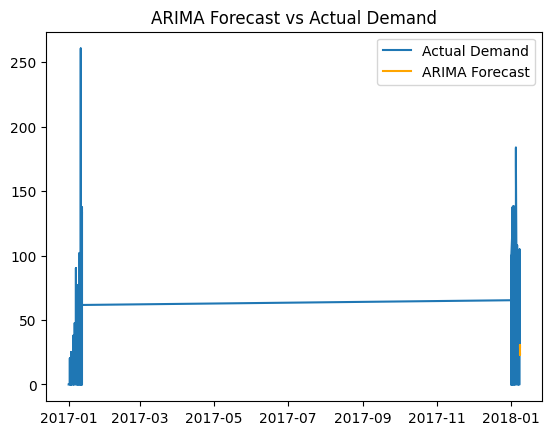

In [25]:
# Fit the ARIMA model without differencing (d=0)
model = ARIMA(df['demand'], order=(1, 0, 1))  # Adjust p and q if needed
arima_result = model.fit()

# Forecasting with ARIMA
df['arima_forecast'] = arima_result.predict(start=len(df) - 12, end=len(df) - 1)  # Last 12 months
print(arima_result.summary())

# Plot ARIMA results
plt.plot(df['month_year'], df['demand'], label='Actual Demand')
plt.plot(df['month_year'], df['arima_forecast'], label='ARIMA Forecast', color='orange')
plt.legend()
plt.title("ARIMA Forecast vs Actual Demand")
plt.show()


In [26]:
# Example of feature engineering: drop non-numeric columns for simplicity
features = df[['total_price', 'freight_price', 'unit_price', 'product_weight_g', 'product_score',
               'weekday', 'weekend', 'holiday', 'volume', 'comp_1', 'ps1', 'fp1',
               'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'price_ratio_1',
               'price_ratio_2', 'price_ratio_3', 'price_diff_1', 'price_diff_2',
               'price_diff_3', 'lag_price']]

# Target variable
target = df['demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [27]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best XGBoost model
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


ARIMA MAE: 29.683532226010936, RMSE: 38.76288913883156

XGBoost MAE: 9.441701251655356, RMSE: 12.091007354039995


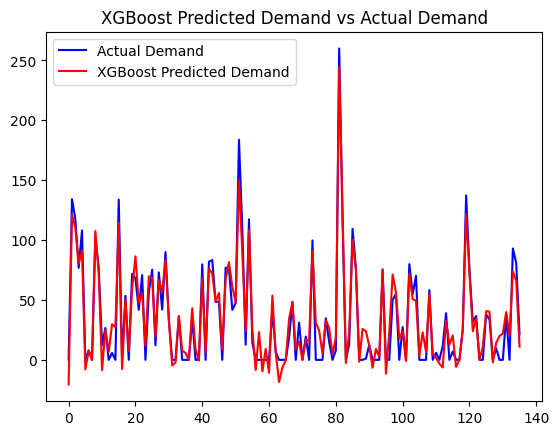

In [28]:
# ARIMA Evaluation
arima_mae = mean_absolute_error(df['demand'].iloc[-12:], df['arima_forecast'].iloc[-12:])
arima_rmse = np.sqrt(mean_squared_error(df['demand'].iloc[-12:], df['arima_forecast'].iloc[-12:]))
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')

# XGBoost Evaluation
y_pred_xgb = best_xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost MAE: {xgb_mae}, RMSE: {xgb_rmse}')

# Plot XGBoost vs Actual Demand
plt.plot(range(len(y_test)), y_test.values, label='Actual Demand', color='blue')
plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label='XGBoost Predicted Demand', color='red')
plt.legend()
plt.title("XGBoost Predicted Demand vs Actual Demand")
plt.show()


Category: bed_bath_table, ADF Statistic: -5.367077536990228, p-value: 3.970403412040828e-06

Forecast for bed_bath_table:

 61    17.870260

62    21.345368

63    22.000429

64    22.123909

65    22.147185

66    22.151573

67    22.152400

68    22.152556

69    22.152585

70    22.152590

71    22.152592

72    22.152592

Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




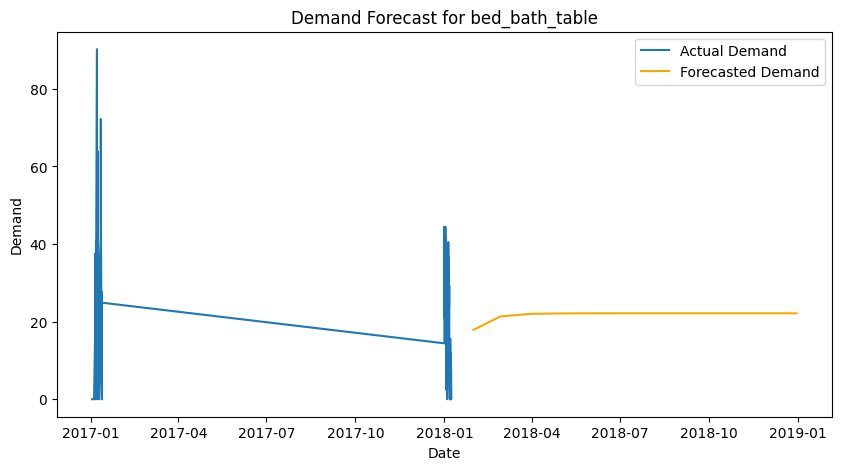

Category: computers_accessories, ADF Statistic: -2.014650595161593, p-value: 0.2801864985862251

Forecast for computers_accessories:

 69    0.257256

70    0.320751

71    0.336422

72    0.340290

73    0.341245

74    0.341480

75    0.341539

76    0.341553

77    0.341557

78    0.341557

79    0.341558

80    0.341558

Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




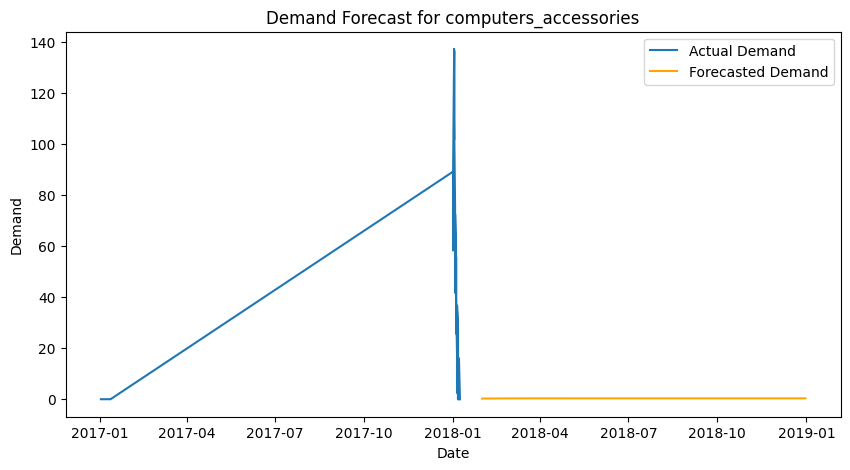

Category: consoles_games, ADF Statistic: -2.115900203500884, p-value: 0.23816930084934318

Forecast for consoles_games:

 22    0.777501

23    0.181267

24    0.638495

25    0.287865

26    0.556749

27    0.350553

28    0.508676

29    0.387418

30    0.480406

31    0.409097

32    0.463781

33    0.421846

Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




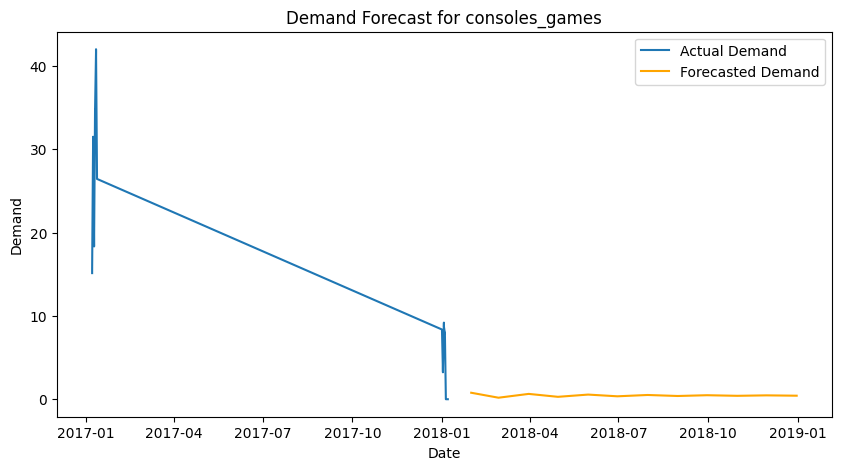

Category: cool_stuff, ADF Statistic: -4.210369083804733, p-value: 0.0006327705598210748

Forecast for cool_stuff:

 57    2.254190

58    3.264786

59    3.906796

60    4.314652

61    4.573754

62    4.738356

63    4.842925

64    4.909355

65    4.951557

66    4.978366

67    4.995398

68    5.006218

Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




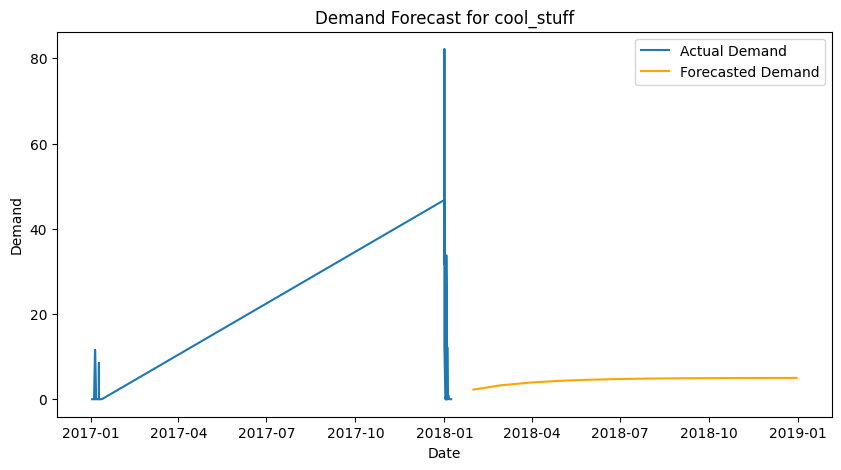

Category: furniture_decor, ADF Statistic: -3.113748698456821, p-value: 0.02555231307873557


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




Forecast for furniture_decor:

 48    17.239301

49    20.507212

50    22.704299

51    24.181447

52    25.174565

53    25.842260

54    26.291165

55    26.592974

56    26.795886

57    26.932309

58    27.024028

59    27.085693

Name: predicted_mean, dtype: float64


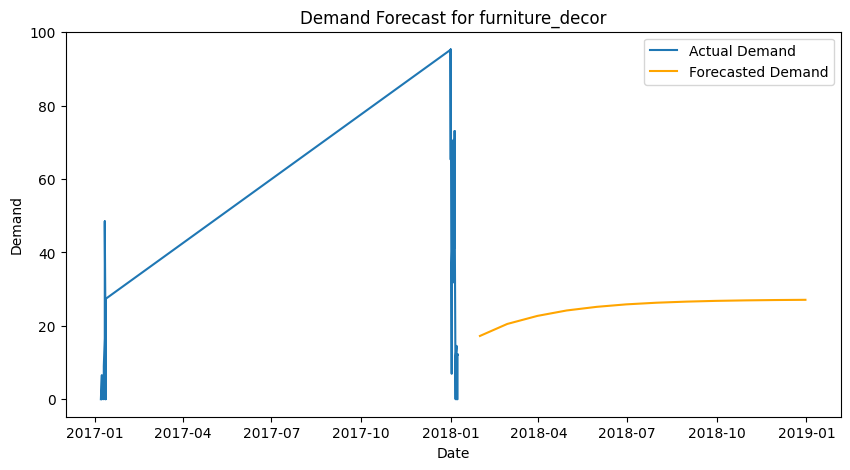

Category: garden_tools, ADF Statistic: -2.403111723187848, p-value: 0.1408600732877502


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




Forecast for garden_tools:

 160    25.390884

161    25.210476

162    25.186876

163    25.183788

164    25.183385

165    25.183332

166    25.183325

167    25.183324

168    25.183324

169    25.183324

170    25.183324

171    25.183324

Name: predicted_mean, dtype: float64


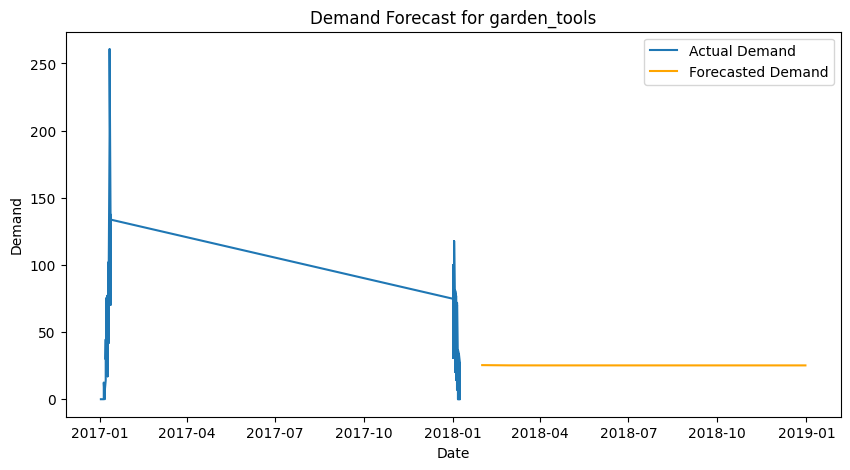

Category: health_beauty, ADF Statistic: -3.097006331991311, p-value: 0.026775528018989248


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




Forecast for health_beauty:

 130    64.667202

131    64.444353

132    64.224077

133    64.006343

134    63.791124

135    63.578388

136    63.368109

137    63.160257

138    62.954805

139    62.751724

140    62.550988

141    62.352569

Name: predicted_mean, dtype: float64


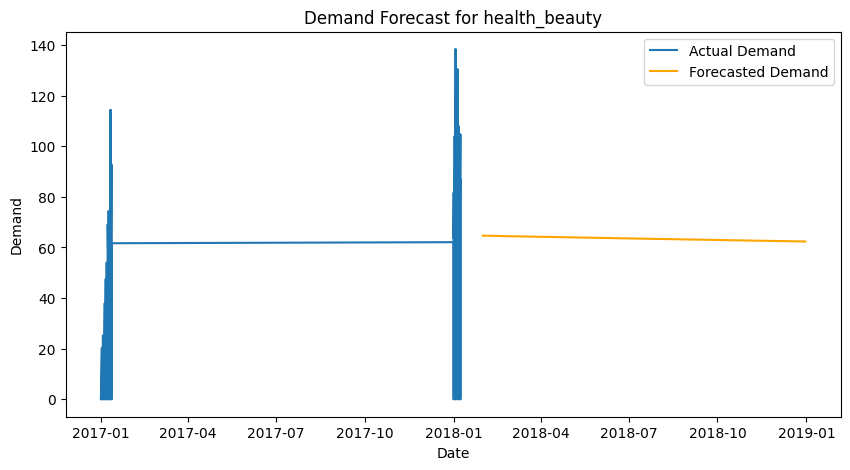

Category: perfumery, ADF Statistic: -5.192154138857136, p-value: 9.1222139806162e-06

Forecast for perfumery:

 26    0.706383

27    1.728233

28    1.116986

29    1.482619

30    1.263906

31    1.394735

32    1.316476

33    1.363289

34    1.335287

35    1.352037

36    1.342017

37    1.348011

Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




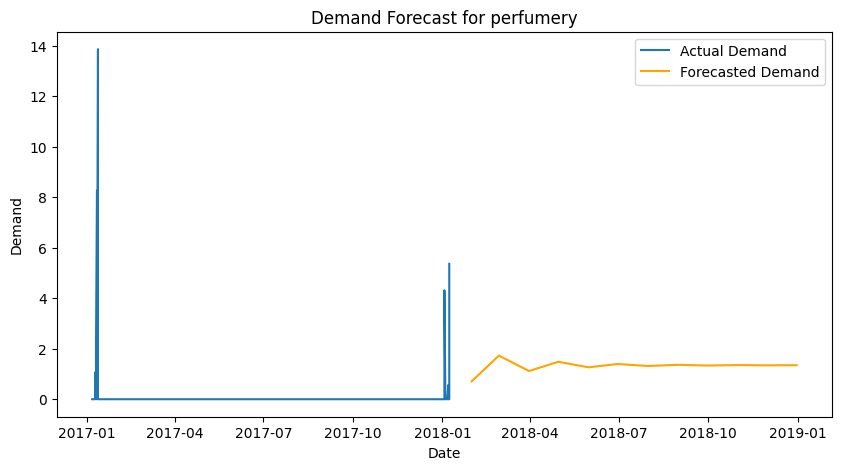

Category: watches_gifts, ADF Statistic: -1.8567449511017722, p-value: 0.3526750429043978

Forecast for watches_gifts:

 103    12.318076

104    12.731898

105    12.906986

106    12.981066

107    13.012409

108    13.025670

109    13.031280

110    13.033654

111    13.034659

112    13.035084

113    13.035264

114    13.035340

Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:



No supported index is available. Prediction results will be given with an integer index beginning at `start`.




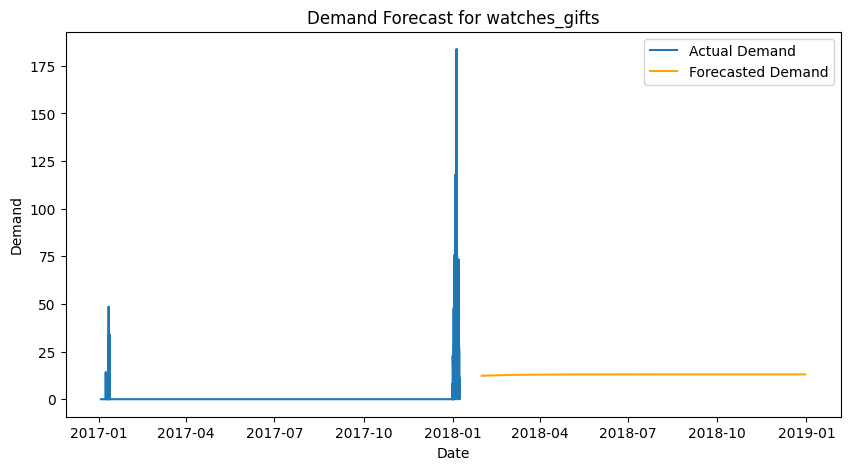

In [29]:
# Store forecasts for each product category
category_forecasts = {}

# Group the data by 'product_category_name'
for category, group_data in df.groupby('product_category_name'):
    # Sort each group by date
    group_data = group_data.sort_values('month_year')

    # Run the ADF test to check for stationarity
    adf_result = adfuller(group_data['demand'])
    print(f"Category: {category}, ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

    # Determine ARIMA order
    if adf_result[1] <= 0.05:
        d = 0  # No differencing needed
    else:
        d = 1  # Differencing needed to make the series stationary

    # Fit ARIMA model (you may need to adjust (p, q) orders or use a method to optimize them)
    try:
        model = ARIMA(group_data['demand'], order=(1, d, 1))
        arima_result = model.fit()

        # Forecast for the next period (you can set the forecast horizon as needed)
        forecast = arima_result.forecast(steps=12)  # Forecasting next 12 months
        category_forecasts[category] = forecast

        # Display forecast results
        print(f"Forecast for {category}:\n", forecast)

        # Plot actual vs forecasted demand
        plt.figure(figsize=(10, 5))
        plt.plot(group_data['month_year'], group_data['demand'], label='Actual Demand')
        plt.plot(pd.date_range(start=group_data['month_year'].max(), periods=12, freq='M'),
                 forecast, label='Forecasted Demand', color='orange')
        plt.title(f"Demand Forecast for {category}")
        plt.xlabel('Date')
        plt.ylabel('Demand')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Could not fit ARIMA for category {category}: {e}")


# **Price Elasticity**

In [31]:
import statsmodels.api as sm

# Store elasticity results for each category
elasticity_results = {}

for category, group_data in df.groupby('product_category_name'):
    # Sort by date and log-transform demand and price
    group_data = group_data.sort_values('month_year')
    group_data['log_demand'] = np.log(group_data['demand'] + 1)  # Add 1 to avoid log(0)
    group_data['log_price'] = np.log(group_data['unit_price'] + 1)

    # Simple linear regression for elasticity estimation
    X = sm.add_constant(group_data['log_price'])
    y = group_data['log_demand']

    model = sm.OLS(y, X).fit()
    elasticity = model.params['log_price']  # Elasticity is the coefficient of log_price

    elasticity_results[category] = elasticity
    print(f"Category: {category}, Price Elasticity: {elasticity:.2f}")


Category: bed_bath_table, Price Elasticity: -2.06

Category: computers_accessories, Price Elasticity: -3.11

Category: consoles_games, Price Elasticity: -4.10

Category: cool_stuff, Price Elasticity: -1.42

Category: furniture_decor, Price Elasticity: -1.40

Category: garden_tools, Price Elasticity: -1.55

Category: health_beauty, Price Elasticity: -1.74

Category: perfumery, Price Elasticity: -1.01

Category: watches_gifts, Price Elasticity: -2.71


1. Elastic Demand: If elasticity < -1, demand is sensitive to price changes, suggesting opportunities to adjust prices strategically.

2. Inelastic Demand: If -1 < elasticity < 0, demand is less sensitive, and price increases may have a limited impact on demand.

As result suggesting that even small price changes could significantly impact demand.

* For Highly Elastic Products (e.g., consoles_games,computers_accessories):


Consider price reductions: Lowering prices could increase demand and potentially overall revenue.
Bundle or Discount Offers: Bundling products or offering discounts could further boost sales without reducing the base price too drastically.

* For Less Elastic Products (e.g., perfumery, furniture_decor):

Gradual Price Adjustments: Demand for these categories is less affected by price, allowing for strategic price increases without significantly lowering demand.
Focus on Brand Value: Emphasize product quality or exclusivity, as demand may not decrease sharply with moderate price increases.

* High R² with Low RMSE: Categories like bed_bath_table, computers_accessories, and garden_tools have both high R² scores and relatively low RMSE values. These models fit well and capture the revenue trends for these categories.

* Low R² with High RMSE: furniture_decor and health_beauty have lower R² scores and higher RMSE values, suggesting these models may not fully capture the revenue pattern. Complex interactions in features or data noise may require either tuning or additional features.

In [35]:
!pip install shap


# **HYBRID MODEL**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming `df` is your DataFrame with relevant columns already loaded
# Define feature sets for each price optimization model

# Common features
common_features = [
    'comp_1', 'ps1', 'fp1',
    'comp_2', 'ps2', 'fp2',
    'comp_3', 'ps3', 'fp3',
    'lag_price', 'demand',
    'revenue_comp1', 'profit_comp1', 'margin_comp1',
    'revenue_comp2', 'profit_comp2', 'margin_comp2',
    'revenue_comp3', 'profit_comp3', 'margin_comp3',
    'revenue_our_product', 'profit_our_product', 'margin_our_product',
    'fp1_diff', 'fp2_diff', 'fp3_diff',
    'price_ratio_1', 'price_ratio_2', 'price_ratio_3',
    'price_diff_1', 'price_diff_2', 'price_diff_3',
    'price_change'
]

# Step 1: Freight Price Model
features_freight = common_features
target_freight = 'freight_price'

# Step 2: Unit Price Model
features_unit = ['optimized_freight_price'] + common_features
target_unit = 'unit_price'

# Step 3: Total Price Model
features_total = ['optimized_freight_price', 'optimized_unit_price', 'qty'] + common_features
target_total = 'total_price'

# Splitting and Scaling function
def prepare_data(features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, scaler

# Function to create and train the model
def train_model(X_train, y_train):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
    return model

# Train Freight Price Model
X_train_freight, X_test_freight, y_train_freight, y_test_freight, scaler_freight = prepare_data(features_freight, target_freight)
model_freight = train_model(X_train_freight, y_train_freight)

# Predict optimized freight price and add to DataFrame
df['optimized_freight_price'] = model_freight.predict(scaler_freight.transform(df[features_freight]))

# Train Unit Price Model
X_train_unit, X_test_unit, y_train_unit, y_test_unit, scaler_unit = prepare_data(features_unit, target_unit)
model_unit = train_model(X_train_unit, y_train_unit)

# Predict optimized unit price and add to DataFrame
df['optimized_unit_price'] = model_unit.predict(scaler_unit.transform(df[features_unit]))

# Train Total Price Model
X_train_total, X_test_total, y_train_total, y_test_total, scaler_total = prepare_data(features_total, target_total)
model_total = train_model(X_train_total, y_train_total)

# Predict optimized total price and add to DataFrame
df['optimized_total_price'] = model_total.predict(scaler_total.transform(df[features_total]))

# User Input for Quantity
quantity = int(input("Enter the quantity: "))

# Display optimized prices for each product category
print("\nOptimized Prices Breakdown:")
for category in df['product_category_name'].unique():
    category_data = df[df['product_category_name'] == category].iloc[0]  # Get first row of the category
    optimized_freight_price = category_data['optimized_freight_price']
    optimized_unit_price = category_data['optimized_unit_price']
    optimized_total_price = category_data['optimized_total_price']

    print(f"Category: {category}")
    print(f"Optimized Freight Price: ${optimized_freight_price:.2f}")
    print(f"Optimized Unit Price: ${optimized_unit_price:.2f}")
    print(f"Total Price for {quantity} units: ${optimized_total_price * quantity:.2f}\n")


Epoch 1/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 527.2967 - mean_absolute_error: 20.6768 - val_loss: 555.2841 - val_mean_absolute_error: 20.6368

Epoch 2/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 473.9398 - mean_absolute_error: 19.4985 - val_loss: 498.0165 - val_mean_absolute_error: 19.3927

Epoch 3/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 429.6370 - mean_absolute_error: 18.3765 - val_loss: 415.5824 - val_mean_absolute_error: 17.5094

Epoch 4/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 340.4641 - mean_absolute_error: 16.0399 - val_loss: 302.6104 - val_mean_absolute_error: 14.5496

Epoch 5/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 202.4845 - mean_absolute_error: 11.7554 - val_loss: 175.7369 - val_mean_absolute_error: 10.5658

Epoch 6/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 130.9650 - mean_absolute_error: 8.8885 - val_loss: 81.6811 - val_mean_absolute_error: 7.2613

Epoch 7/100

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define features and target for sales forecasting
features_sales_forecast = [
    'optimized_total_price', 'qty',  # Include quantity as a feature if it is relevant
    'comp_1', 'comp_2', 'comp_3',
    'fp1', 'fp2', 'fp3',
    'demand'  # Any other relevant features can be included here
]
target_sales = 'qty'  # Adjust this to your actual sales quantity column name

# Prepare data for sales forecasting
X_sales = df[features_sales_forecast]
y_sales = df[target_sales]

# Split into training and test sets for sales forecasting
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# Instantiate and train the XGBoost model
model_sales_forecast = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model_sales_forecast.fit(X_train_sales, y_train_sales)

# Make predictions on the test set
y_pred_sales = model_sales_forecast.predict(X_test_sales)

# Evaluate the model for sales forecasting
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
mae_sales = mean_absolute_error(y_test_sales, y_pred_sales)
print(f"Sales Forecasting - Mean Absolute Error: {mae_sales:.2f}")
print(f"Sales Forecasting - Mean Squared Error: {mse_sales:.2f}")

# Adding predictions to the DataFrame for analysis
df['predicted_sales_qty'] = model_sales_forecast.predict(X_sales)

# Display results for each product category
print("\nForecasted Sales Quantity by Product Category:")
for category in df['product_category_name'].unique():
    category_data = df[df['product_category_name'] == category]
    avg_forecasted_sales = category_data['predicted_sales_qty'].mean()
    avg_optimized_price = category_data['optimized_total_price'].mean()
    print(f"Category: {category}, Forecasted Sales Quantity: {avg_forecasted_sales:.2f}, Optimized Total Price: ${avg_optimized_price:.2f}")


Sales Forecasting - Mean Absolute Error: 0.12

Sales Forecasting - Mean Squared Error: 0.69



Forecasted Sales Quantity by Product Category:

Category: health_beauty, Forecasted Sales Quantity: 14.16, Optimized Total Price: $1552.91

Category: bed_bath_table, Forecasted Sales Quantity: 16.82, Optimized Total Price: $1639.69

Category: garden_tools, Forecasted Sales Quantity: 14.96, Optimized Total Price: $981.84

Category: cool_stuff, Forecasted Sales Quantity: 9.79, Optimized Total Price: $1003.37

Category: computers_accessories, Forecasted Sales Quantity: 16.90, Optimized Total Price: $2101.59

Category: watches_gifts, Forecasted Sales Quantity: 13.88, Optimized Total Price: $2014.81

Category: perfumery, Forecasted Sales Quantity: 9.38, Optimized Total Price: $825.09

Category: furniture_decor, Forecasted Sales Quantity: 18.44, Optimized Total Price: $1205.23

Category: consoles_games, Forecasted Sales Quantity: 10.86, Optimized Total Price: $298.33


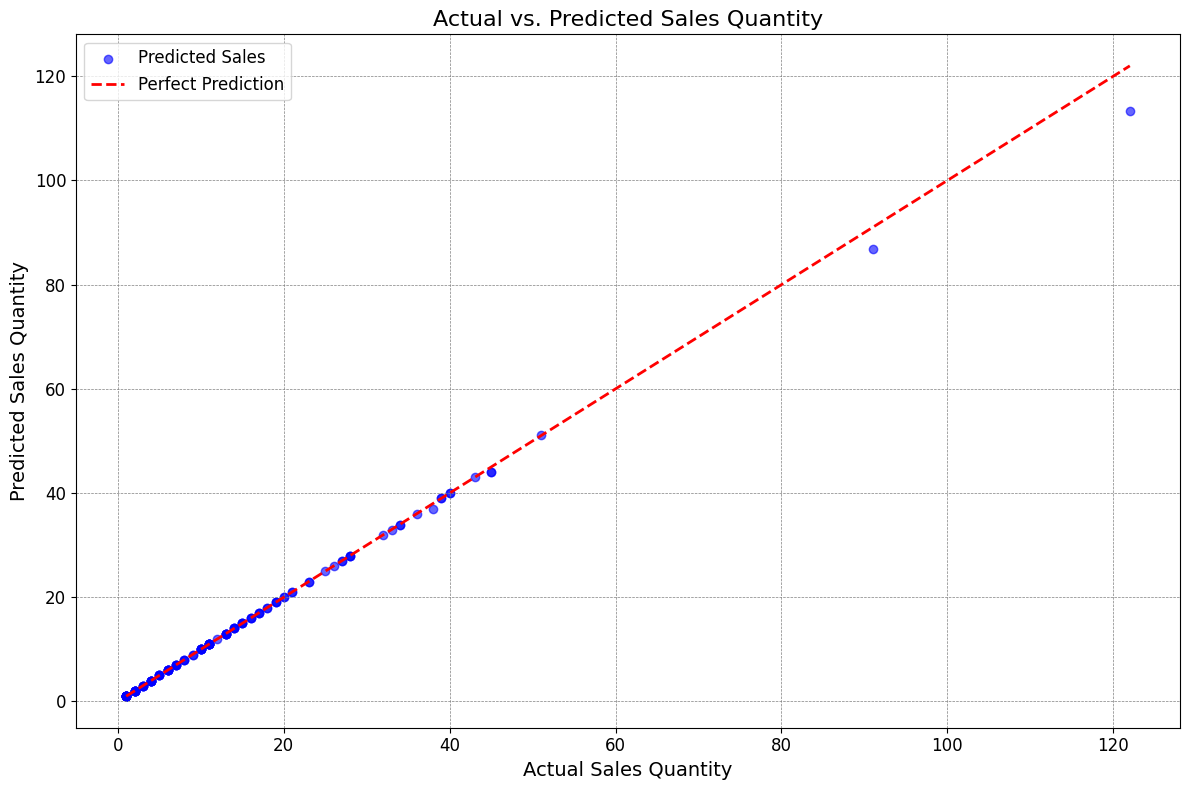

In [59]:

# Create a scatter plot of actual vs predicted sales
plt.figure(figsize=(12, 8))
plt.scatter(y_test_sales, y_pred_sales, color='blue', alpha=0.6, label='Predicted Sales')
plt.plot([y_test_sales.min(), y_test_sales.max()], [y_test_sales.min(), y_test_sales.max()], 'r--', lw=2, label='Perfect Prediction')

# Adding titles and labels
plt.title('Actual vs. Predicted Sales Quantity', fontsize=16)
plt.xlabel('Actual Sales Quantity', fontsize=14)
plt.ylabel('Predicted Sales Quantity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add a legend to identify the lines
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [68]:
comparison_df = df_test_total[['product_category_name', 'original_total_price', 'optimized_total_price']]

# Calculate the difference
comparison_df['difference'] = comparison_df['optimized_total_price'] - comparison_df['original_total_price']

# Display the DataFrame for verification
print(comparison_df)



     product_category_name  original_total_price  optimized_total_price  \

0               cool_stuff                 65.00              21.313372   

1             garden_tools               2232.60            2182.273438   

2             garden_tools               1970.10            1916.649536   

3             garden_tools               1509.20            1540.429321   

4            health_beauty                 71.97              35.252098   

..                     ...                   ...                    ...   

131  computers_accessories                 45.95              21.313372   

132             cool_stuff                899.91             963.609009   

133          watches_gifts               5956.30            4724.390137   

134           garden_tools                107.80              64.378853   

135          watches_gifts               1995.00            1890.959717   



      difference  

0     -43.686628  

1     -50.326562  

2     -53.450464  

3     

   product_category_name  mean_total_price  mean_optimized_price  \

0  computers_accessories       1277.587826           1341.234985   

1         consoles_games        428.325000            329.859833   

2             cool_stuff        891.519500            848.283813   

3        furniture_decor       1531.785000           1629.520142   

4           garden_tools       1041.720333           1040.979736   

5          health_beauty       1903.331818           1720.011230   

6              perfumery        410.730000            419.580688   

7          watches_gifts       1791.713200           1709.725830   



   price_difference  

0         63.647159  

1        -98.465167  

2        -43.235687  

3         97.735142  

4         -0.740597  

5       -183.320588  

6          8.850688  

7        -81.987370  


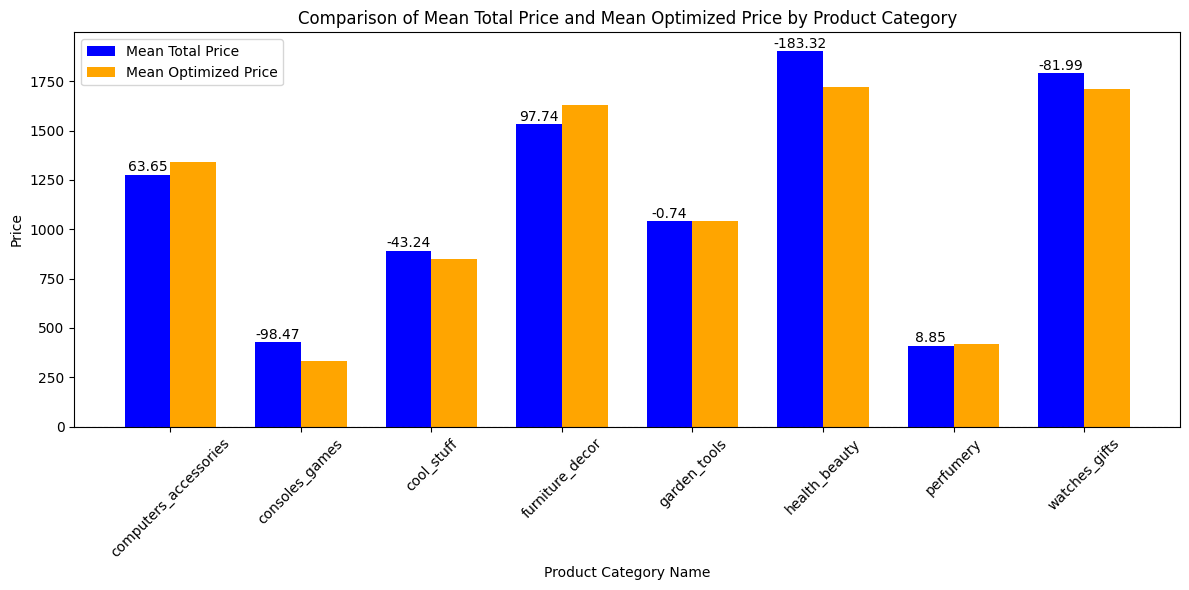

In [67]:
# Create a DataFrame to hold total and optimized prices by category
comparison_df = df_test_total.groupby('product_category_name').agg(
    mean_total_price=('original_total_price', 'mean'),
    mean_optimized_price=('optimized_total_price', 'mean')
).reset_index()

# Calculate the difference
comparison_df['price_difference'] = comparison_df['mean_optimized_price'] - comparison_df['mean_total_price']

# Display the DataFrame
print(comparison_df)

# Visualization
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(comparison_df))

# Bar plots for mean total price and mean optimized price
plt.bar(index, comparison_df['mean_total_price'], bar_width, label='Mean Total Price', color='blue')
plt.bar([i + bar_width for i in index], comparison_df['mean_optimized_price'], bar_width, label='Mean Optimized Price', color='orange')

# Adding labels and title
plt.xlabel('Product Category Name')
plt.ylabel('Price')
plt.title('Comparison of Mean Total Price and Mean Optimized Price by Product Category')
plt.xticks([i + bar_width / 2 for i in index], comparison_df['product_category_name'], rotation=45)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.legend()

# Displaying the price difference on the plot
for i in index:
    plt.text(i, comparison_df['mean_total_price'][i] + 1, f"{comparison_df['price_difference'][i]:.2f}",
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


Enter quantity for cool_stuff: 154

Enter quantity for garden_tools: 547

Enter quantity for health_beauty: 7

Enter quantity for computers_accessories: 51

Enter quantity for watches_gifts: 444

Enter quantity for furniture_decor: 6295

Enter quantity for consoles_games: 16

Enter quantity for perfumery: 6158


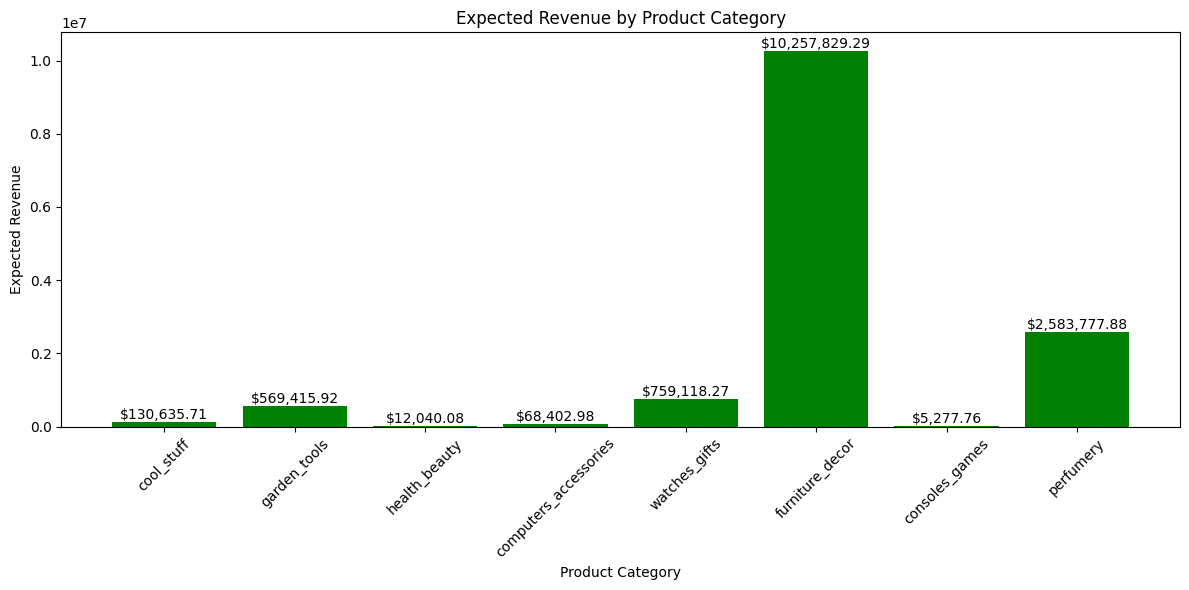

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_test_total contains 'optimized_total_price' and 'product_category_name'

# Step 1: Get user input for quantity for each product category
quantity_input = {}
for category in df_test_total['product_category_name'].unique():
    quantity = float(input(f"Enter quantity for {category}: "))
    quantity_input[category] = quantity

# Step 2: Calculate expected revenue for each category
# -- Creating a temporary dataframe here to get the optimized price --
comparison_df_temp = df_test_total.groupby('product_category_name').agg(
    mean_optimized_price=('optimized_total_price', 'mean')
).reset_index()

expected_revenue = {}
for category in quantity_input:
    # -- Using the temporary dataframe for calculation --
    optimized_price = comparison_df_temp.loc[comparison_df_temp['product_category_name'] == category, 'mean_optimized_price'].values[0]
    expected_revenue[category] = optimized_price * quantity_input[category]

# Step 3: Prepare DataFrame for visualization
revenue_df = pd.DataFrame(list(expected_revenue.items()), columns=['Product Category', 'Expected Revenue'])

# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.bar(revenue_df['Product Category'], revenue_df['Expected Revenue'], color='green')
plt.xlabel('Product Category')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue by Product Category')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')

# Display the expected revenue on top of the bars
for i in range(len(revenue_df)):
    plt.text(i, revenue_df['Expected Revenue'][i] + 1, f"${revenue_df['Expected Revenue'][i]:,.2f}",
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

Category: bed_bath_table


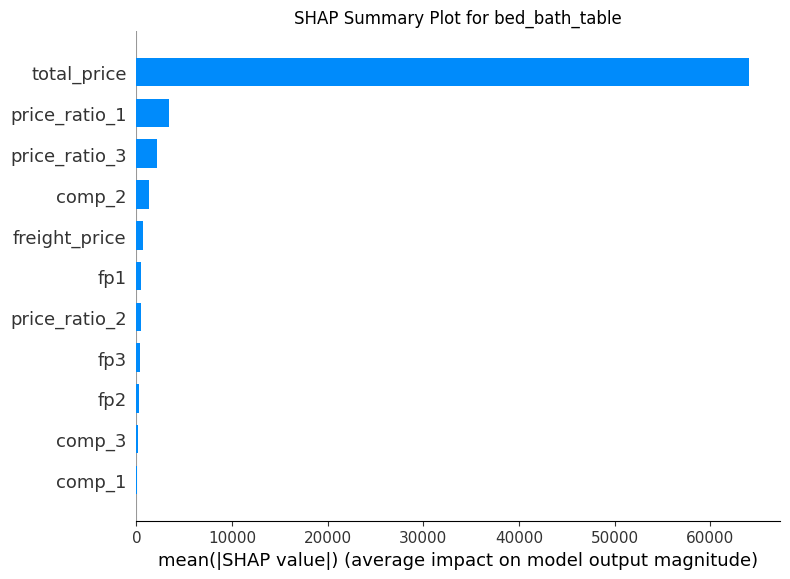

Category: computers_accessories


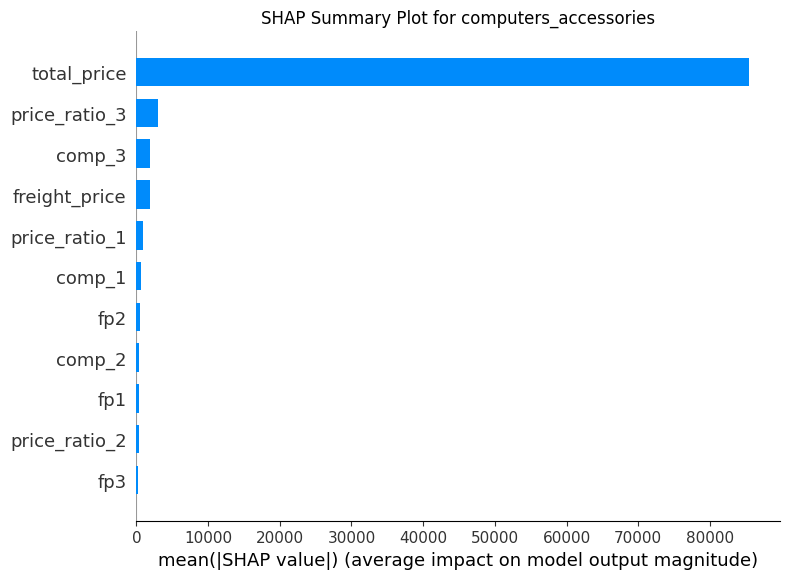

Category: consoles_games


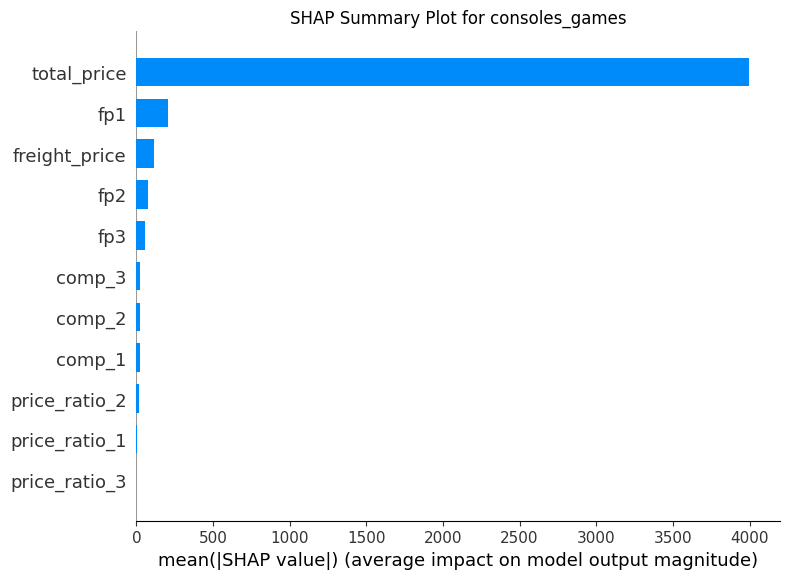

Category: cool_stuff


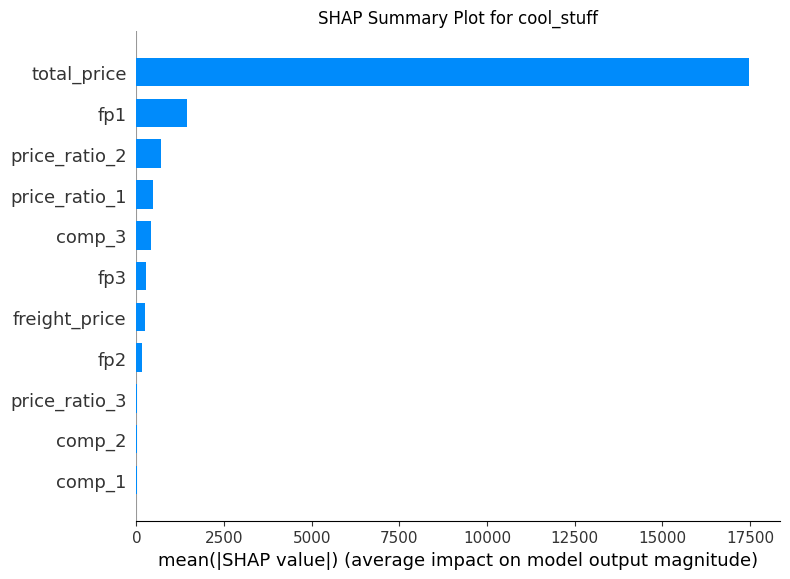

Category: furniture_decor


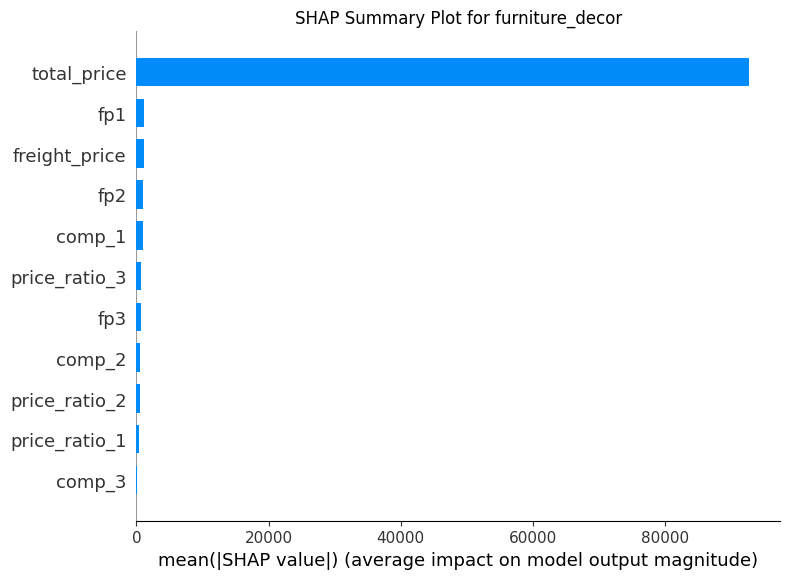

Category: garden_tools


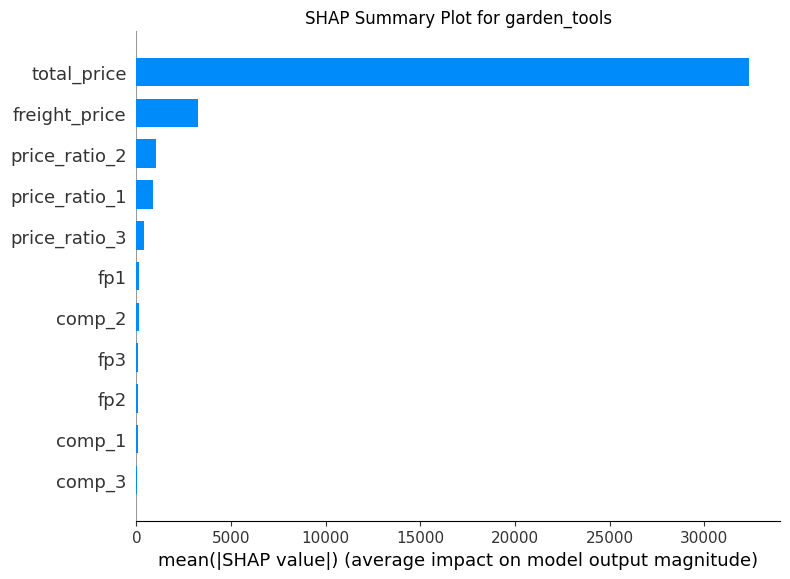

Category: health_beauty


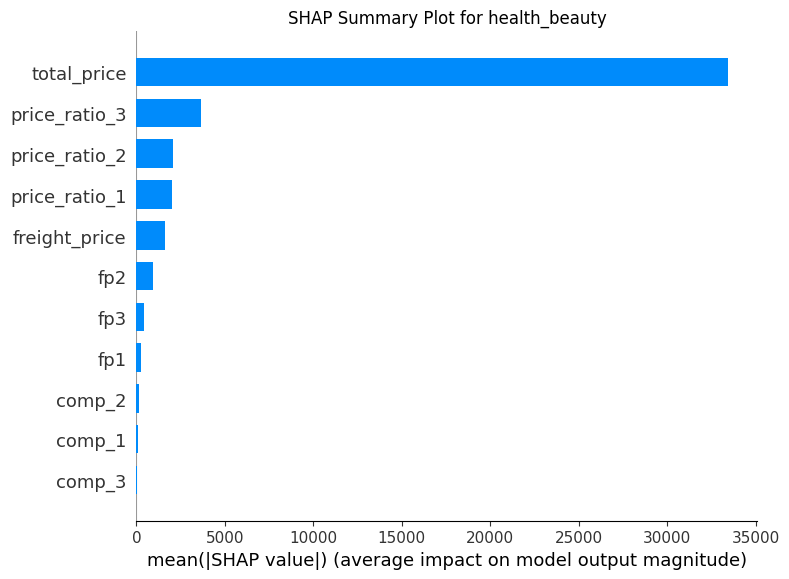

Category: perfumery


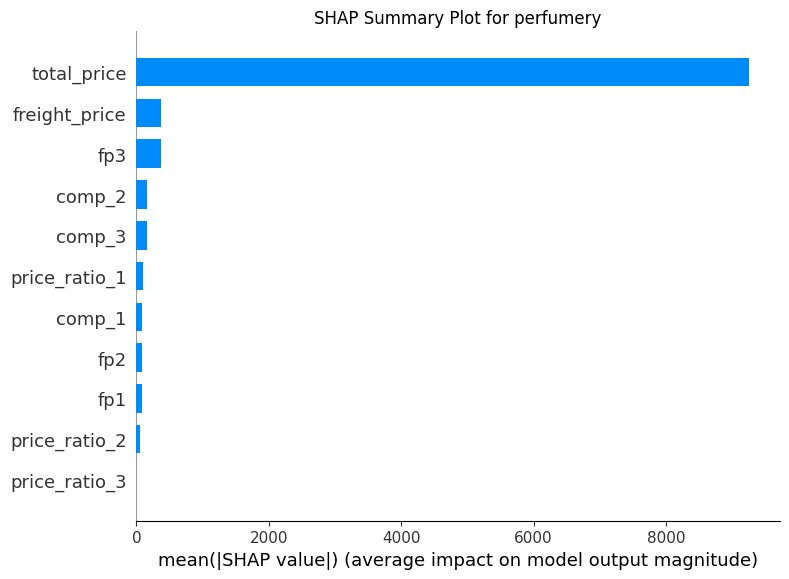

Category: watches_gifts


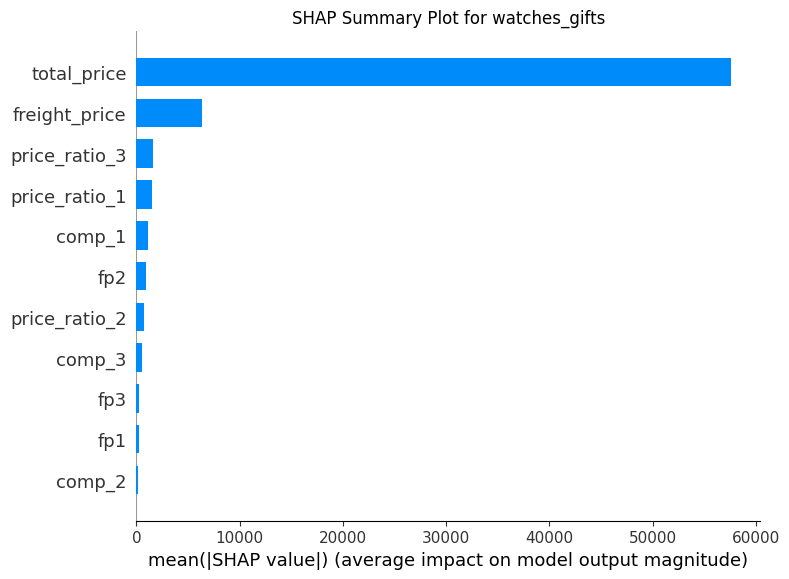

In [69]:
111116from sklearn.ensemble import RandomForestRegressor
# Initialize the SHAP explainer for each category
shap_results = {}

for category, group_data in df.groupby('product_category_name'):
    print(f"Category: {category}")

    # Prepare the feature set
    features = group_data[['total_price', 'freight_price', 'comp_1', 'comp_2', 'comp_3', 'fp1', 'fp2', 'fp3',
                           'price_ratio_1', 'price_ratio_2', 'price_ratio_3']]
    target = group_data['revenue_our_product']

    # Train model (Random Forest as in previous steps)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(features, target)

    # SHAP explanation
    explainer = shap.TreeExplainer(model) # Changed to TreeExplainer for tree-based models
    shap_values = explainer.shap_values(features) # Changed to use shap_values method

    # Store SHAP values for each category
    shap_results[category] = shap_values

    # Summary plot for feature importance
    plt.title(f"SHAP Summary Plot for {category}")
    shap.summary_plot(shap_values, features, plot_type="bar")
    plt.show()